In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Récupération des données
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.info()
print('\n')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

In [5]:
# Aperçu des données
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Variables catégorielles**

Survived (vrai/faux) || 0 = No, 1 = Yes    
Sex (homme/femme) || male, female    
Embarked (Port d'embarquation) || C = Cherbourg, Q = Queenstown, S = Southampton    
Pclass (classe du ticket 1-3) || 1 = 1st, 2 = 2nd, 3 = 3rd    

**Variables numériques**

Age (années)    
Fare (tarif du ticket)    
SibSp (nombre frère/soeur , épous.e)   
Parch (nombre parents, enfants)    

**Variables mixtes**

(alphanumériques) 
Ticket (n° de)    
Cabin (n° de)   

**Les risques**

- Cabin a des données manquantes / nulles
- Age a des donénes manquantes / nulles
- Certains noms peuvent avoir des problèmes au niveau des caratères

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Suppression de colonnes**

De toutes les données, le numéro de cabine est déjà certaines difficile à utiliser :
- on ne connait pas l'emplacement, le type
- il manque beaucoup trop de valeurs

De même que pour le numéro de ticket :
- on ne connait pas l'emplacement, le type
- La données n'est pas constante, difficile à analyser

In [8]:
# Suppression de la colonne 'Ticket' et 'Cabin'
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Fare' 'Embarked']


**Hypothèses**

Avec la connaissance que nous avons (nombre de canaux limités, etc) sur le sujet on peut penser que :
- Les classes sociales les plus élevées ont plus survécu que d'autres (Pclass/Fare)
- Les femmes et les enfants ont plus de chances de survivre (Sex)
- Les enfants ont plus de chances de survivre (Age)

**Première analyse statistique**

Pour commencer, il est possible de regarder la correlation entre certaines données et la survie.
On peut se permettre cette étape dès maintenant, car le sujet a peu de variables.   
On ne regarde que les variables catégorielles et discrètes.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


La classe des tickets semble être corrélée avec la survie.
Plus la classe du ticket est luxueuse plus la personne a des chances d'avoir survécu.

In [10]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


On remarque que les femmes ont plus survécu que les hommes.

In [11]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Sans contexte, le lieu d'embarquation est difficile a corréler avec la survie.
Malgré tout, ces données restent utilisables.

In [12]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


On peut remarqué que plus l'invidivu a une famille nombreuse, moins il a l'air d'avoir une chance de survivre.

**Conclusion**

Toutes les données ci-dessus sont intégrables dans notre modèle de décision.   
De prime abord, elle peuvent toutes nous apporter des conjectures intéressantes.

**Analyse Visuelle**

Dans un second temps, il est possible de faire une analyse "visuelle".   
On applique cette analyse pour les variables continues et numériques.   
Généralement on peut s'en servir pour faire du clusturing (assez basique pour ces données)

**Par rapport à l'âge**

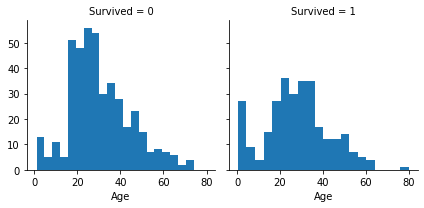

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

**Par rapport aux facteurs classe du ticket/tarif/lieu d'embarquation**

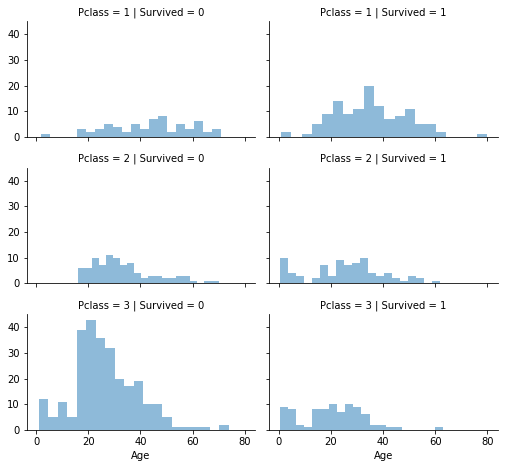

In [26]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

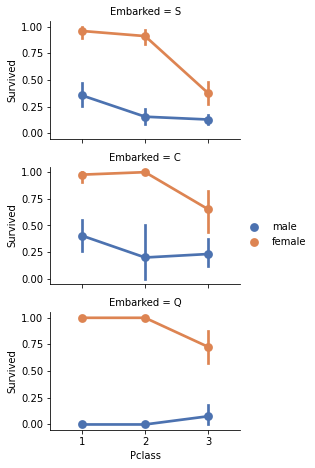

In [19]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1,2,3], hue_order=["male", "female"])
grid.add_legend()

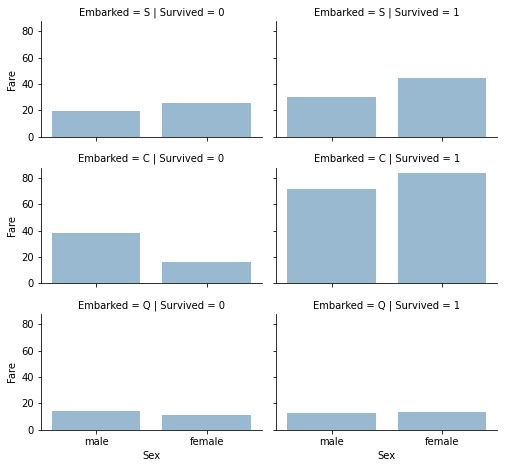

In [24]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None, order = ["male", "female"])
grid.add_legend()

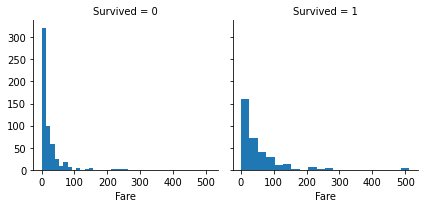

In [25]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)
grid.add_legend()

C:\Users\Bertrand PASSIEUX\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


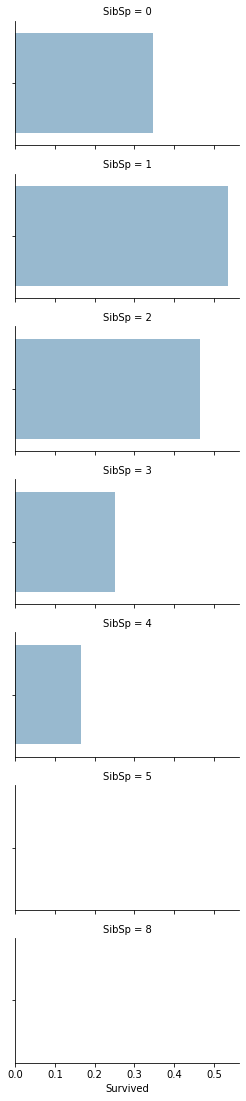

In [42]:
# le but c'est de faire corr entre SibSp / Parch et la survie pour réusnir les 2
g = sns.FacetGrid(train_df, row='SibSp', height=2.2, aspect=1.6)
g.map(sns.barplot, 'Survived', alpha=.5, ci=None, )
grid.add_legend()